<a href="https://colab.research.google.com/github/kautilyasingh07/ML_project_02_Forest_cover/blob/main/Forest_Cover_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Forest Cover Type Classification

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score
import time
import warnings

# Suppress convergence warnings
warnings.filterwarnings('ignore')

## 1. Load and Preprocess Data

In [5]:
# Read from local csv
df = pd.read_csv('covtype.csv')
pd.set_option('display.max_columns', None)

In [6]:
df.isnull().sum()

,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0
Horizontal_Distance_To_Fire_Points,0


1 missing value across many columns (likely a trailing empty line), including the target variable.

In [7]:
print(f'Original shape: {df.shape}')
df.dropna(inplace=True)
print(f'Shape after dropping missing values: {df.shape}')

Original shape: (137782, 55)
Shape after dropping missing values: (137781, 55)


In [8]:
# Last column is the target (Cover_Type)
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [9]:
print(f'Dataset shape: {X.shape}')
# Use pd.unique for checks since numpy import was removed
print(f'Target classes: {pd.unique(y)}')

Dataset shape: (137781, 54)
Target classes: [5. 2. 1. 7. 3. 6. 4.]


In [10]:
X_df = pd.DataFrame(X)
y_df = pd.DataFrame(y)
X_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137781 entries, 0 to 137780
Data columns (total 54 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       137781 non-null  float64
 1   1       137781 non-null  float64
 2   2       137781 non-null  float64
 3   3       137781 non-null  float64
 4   4       137781 non-null  float64
 5   5       137781 non-null  float64
 6   6       137781 non-null  float64
 7   7       137781 non-null  float64
 8   8       137781 non-null  float64
 9   9       137781 non-null  float64
 10  10      137781 non-null  float64
 11  11      137781 non-null  float64
 12  12      137781 non-null  float64
 13  13      137781 non-null  float64
 14  14      137781 non-null  float64
 15  15      137781 non-null  float64
 16  16      137781 non-null  float64
 17  17      137781 non-null  float64
 18  18      137781 non-null  float64
 19  19      137781 non-null  float64
 20  20      137781 non-null  float64
 21  21      13

In [11]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [12]:
# Feature Scaling
print('Scaling features...')

# REASONING:
# Features 0-9 are Quantitative (Continuous). We scale them to handle large variances.
# Features 10-53 are Binary (0/1). We do NOT scale them to preserve sparsity.

print('Feature Types and Scaling Strategy:')
print(f' - Continuous Features (Indices 0-9): {df.columns[:10].tolist()}')
print('   -> Applying StandardScaler to these columns.')
print(f' - Binary Features (Indices 10-53): {df.columns[10:-1].tolist()}')
print('   -> Leaving these columns unscaled (0/1).')

scaler = StandardScaler()
# Scale only the first 10 quantitative features
X_train[:, :10] = scaler.fit_transform(X_train[:, :10])
X_test[:, :10] = scaler.transform(X_test[:, :10])

print('Feature scaling complete for continuous variables.')


Scaling features...
Feature Types and Scaling Strategy:
 - Continuous Features (Indices 0-9): ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points']
   -> Applying StandardScaler to these columns.
 - Binary Features (Indices 10-53): ['Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type7', 'Soil_Type8', 'Soil_Type9', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type14', 'Soil_Type15', 'Soil_Type16', 'Soil_Type17', 'Soil_Type18', 'Soil_Type19', 'Soil_Type20', 'Soil_Type21', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type25', 'Soil_Type26', 'Soil_Type27', 'Soil_Type28', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type34', 'Soil_Type35

## 2. Exploratory Data Analysis (EDA)

In [13]:
col_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points'
]


In [14]:
# Create subset dataframe for statistics
df_subset = pd.DataFrame(X_train[:, :10], columns=col_names)
print('Summary Statistics (First 10 Features):')
display(df_subset.describe())

Summary Statistics (First 10 Features):


,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points
count,1.102240e+05,1.102240e+05,1.102240e+05,1.102240e+05,1.102240e+05,1.102240e+05,1.102240e+05,1.102240e+05,1.102240e+05,1.102240e+05
mean,-1.056944e-15,6.858919e-17,-4.957245e-17,5.949983e-17,4.496331e-17,6.549494e-17,3.878126e-16,2.004171e-16,-1.604497e-16,-9.192498e-17
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00
min,-4.723341e+00,-1.311176e+00,-1.881876e+00,-1.305423e+00,-4.379623e+00,-1.931552e+00,-1.010879e+01,-7.778645e+00,-4.481516e+00,-1.765084e+00
25%,-6.027508e-01,-8.073647e-01,-7.789994e-01,-8.139559e-01,-6.710781e-01,-8.828863e-01,-4.866031e-01,-5.515810e-01,-5.998240e-01,-8.163890e-01
50%,1.716198e-01,-2.942240e-01,-1.487844e-01,-2.086753e-01,-2.832564e-01,6.009030e-02,2.106564e-01,1.278866e-01,-2.238220e-02,-1.782785e-01
75%,6.080833e-01,6.854082e-01,4.814306e-01,5.673256e-01,3.954315e-01,8.063688e-01,6.754961e-01,6.838146e-01,6.192198e-01,8.297102e-01
max,4.597265e+00,2.047563e+00,7.728903e+00,5.642371e+00,1.258758e+01,2.247256e+00,1.698143e+00,1.795671e+00,3.474349e+00,2.285506e+00


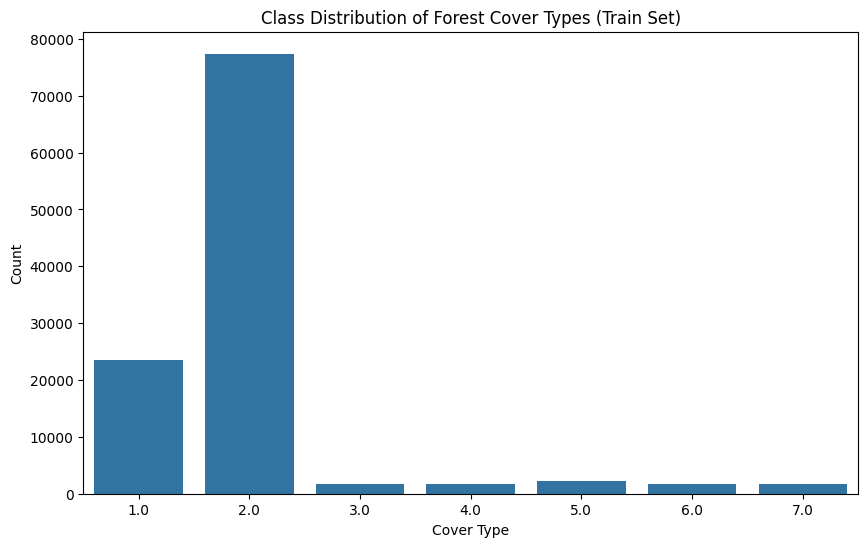

In [15]:

# Class Distribution
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train)
plt.title('Class Distribution of Forest Cover Types (Train Set)')
plt.xlabel('Cover Type')
plt.ylabel('Count')
plt.show()

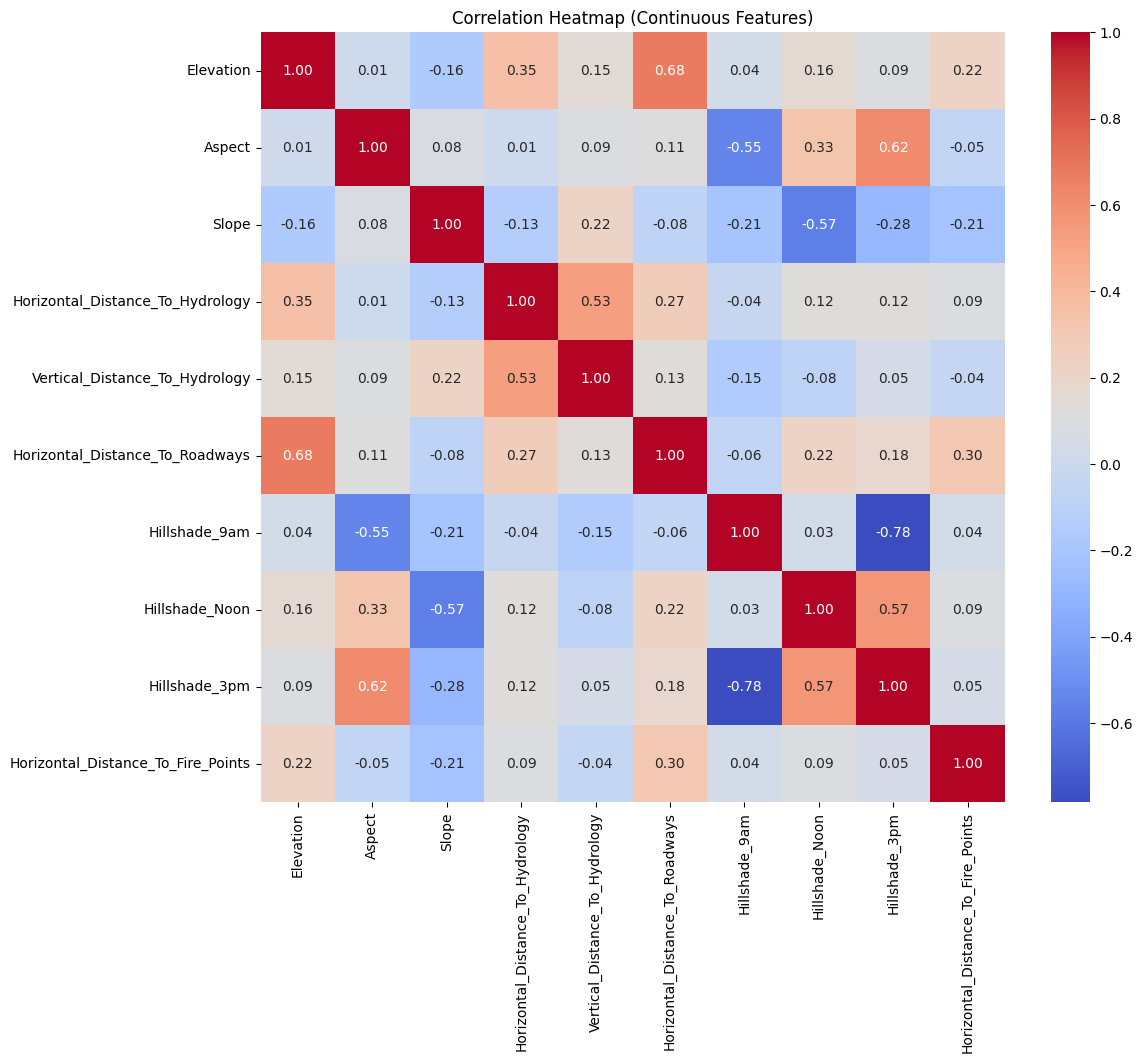

In [16]:
# Correlation Heatmap
plt.figure(figsize=(12, 10))
corr = df_subset.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap (Continuous Features)')
plt.show()

## 3. Model Training (with K-Fold Cross Validation)

In [17]:
models = {
    'Logistic Regression': LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=500, n_jobs=-1),
    'SVM (Linear)': LinearSVC(dual=False, random_state=42),
    'Neural Network': MLPClassifier(hidden_layer_sizes=(256, 128), max_iter=500, random_state=42)
}

# Redundant import to ensure cell runs independently if top cell wasn't run
from sklearn.model_selection import StratifiedKFold, cross_val_score

results = []
confusion_matrices = {}
n_folds = 5
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

for name, model in models.items():
    print(f'\nProcessing {name}...')

    # 1. K-Fold Cross Validation
    print(f' - Performing {n_folds}-Fold Cross Validation...')
    cv_start = time.time()
    # We use a subset of training data for CV speed if dataset is huge,
    # but here we run on full X_train for correctness.
    cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy', n_jobs=-1)
    cv_time = time.time() - cv_start

    print(f' - Mean CV Accuracy: {cv_scores.mean():.4f} (+/- {cv_scores.std():.4f})')
    print(f' - CV Time: {cv_time:.2f}s')

    # 2. Final Training on Classification
    print(f' - Training on 100% of Training Set...')
    start_time = time.time()
    model.fit(X_train, y_train)
    train_time = time.time() - start_time
    print(f' - Training Time: {train_time:.2f}s')

    print(f' - Evaluating on Test Set...')
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='macro')
    rec = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')

    results.append({
        'Model': name,
        'CV Accuracy (Mean)': cv_scores.mean(),
        'Test Accuracy': acc,
        'Precision': prec,
        'Recall': rec,
        'F1-Score': f1,
        'Train Time': train_time
    })

    confusion_matrices[name] = confusion_matrix(y_test, y_pred)


Processing Logistic Regression...
 - Performing 5-Fold Cross Validation...
 - Mean CV Accuracy: 0.8272 (+/- 0.0013)
 - CV Time: 12.99s
 - Training on 100% of Training Set...
 - Training Time: 8.91s
 - Evaluating on Test Set...

Processing SVM (Linear)...
 - Performing 5-Fold Cross Validation...
 - Mean CV Accuracy: 0.8208 (+/- 0.0013)
 - CV Time: 4.83s
 - Training on 100% of Training Set...
 - Training Time: 2.95s
 - Evaluating on Test Set...

Processing Neural Network...
 - Performing 5-Fold Cross Validation...
 - Mean CV Accuracy: 0.9398 (+/- 0.0022)
 - CV Time: 399.50s
 - Training on 100% of Training Set...
 - Training Time: 3352.69s
 - Evaluating on Test Set...


## 4. Comparison and Conclusion

In [18]:
results_df = pd.DataFrame(results)

print('\nFinal Comparison Table:')
display(results_df)

best_model = results_df.loc[results_df['Test Accuracy'].idxmax()]
print(f'\nBest Model: {best_model["Model"]} with Test Accuracy: {best_model["Test Accuracy"]:.4f}')

explanation = ''
if best_model['Model'] == 'Neural Network':
    explanation = 'The Neural Network likely performed best due to its ability to capture non-linear relationships in the data through hidden layers.'
elif best_model['Model'] == 'SVM (Linear)':
    explanation = 'Linear SVM performed well, indicating the classes might be reasonably separable in high-dimensional space.'
else:
    explanation = 'Logistic Regression provided a strong baseline, suggesting linear decision boundaries are effective.'

print('\nExplanation:')
print(explanation)


Final Comparison Table:


,Model,CV Accuracy (Mean),Test Accuracy,Precision,Recall,F1-Score,Train Time
0,Logistic Regression,0.827234,0.828646,0.748936,0.676131,0.699853,8.913640
1,SVM (Linear),0.820774,0.820917,0.719926,0.629696,0.656772,2.951168
2,Neural Network,0.939823,0.945204,0.891980,0.896651,0.894233,3352.688303



Best Model: Neural Network with Test Accuracy: 0.9452

Explanation:
The Neural Network likely performed best due to its ability to capture non-linear relationships in the data through hidden layers.


### Confusion Matrices

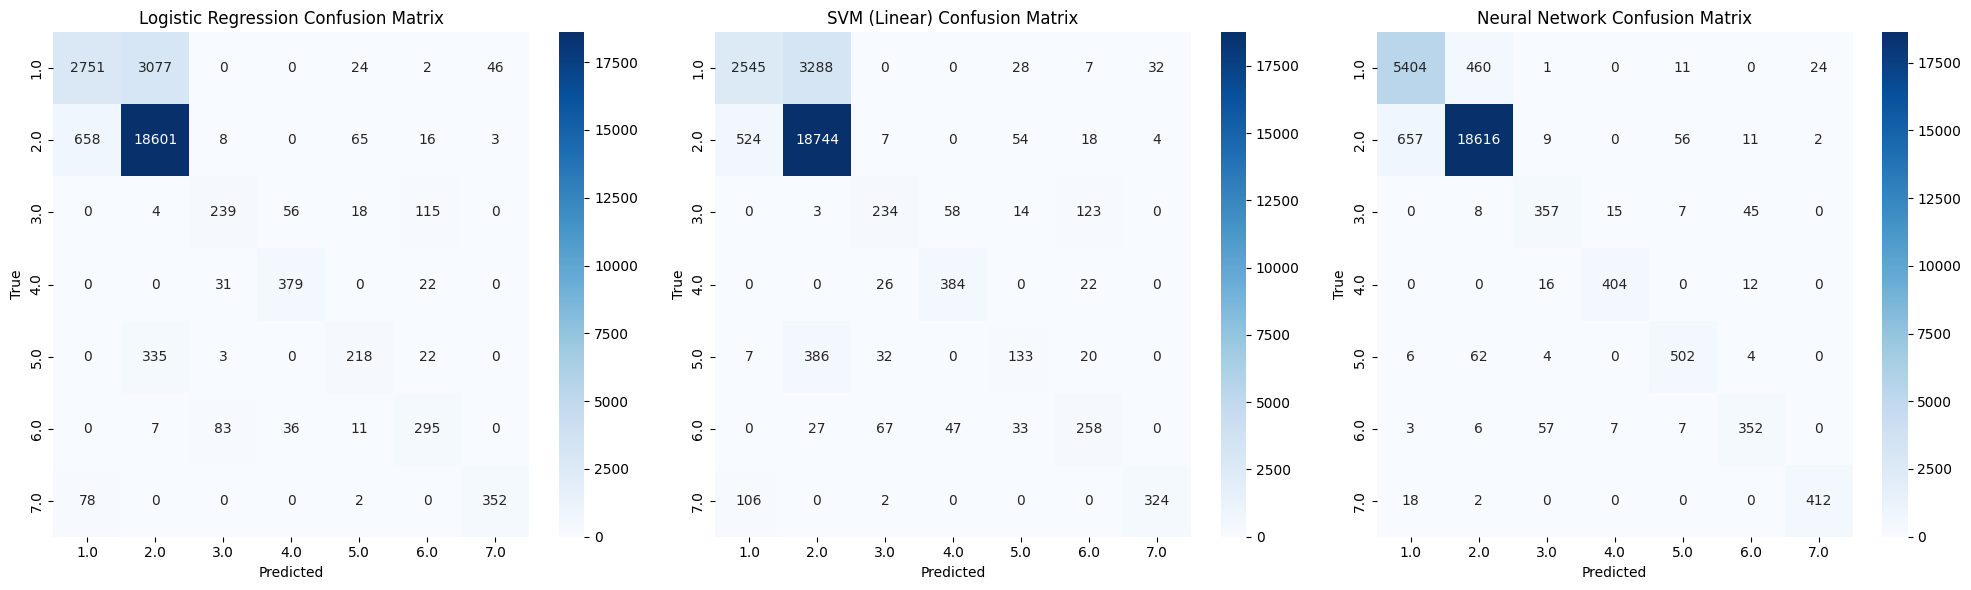

In [19]:
class_names = [str(i) for i in sorted(pd.unique(y_train))]

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for i, (name, cm) in enumerate(confusion_matrices.items()):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[i], xticklabels=class_names, yticklabels=class_names)
    axes[i].set_title(f'{name} Confusion Matrix')
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()